In [3]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans


In [4]:
image_path=("G:\My Drive\Riyadh-Data-set\RUH-B4-B8_2018-12-15.tif")

In [5]:
data = gdal.Open(image_path)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [9]:
band = data.GetRasterBand(1)
ndvi = band.ReadAsArray()

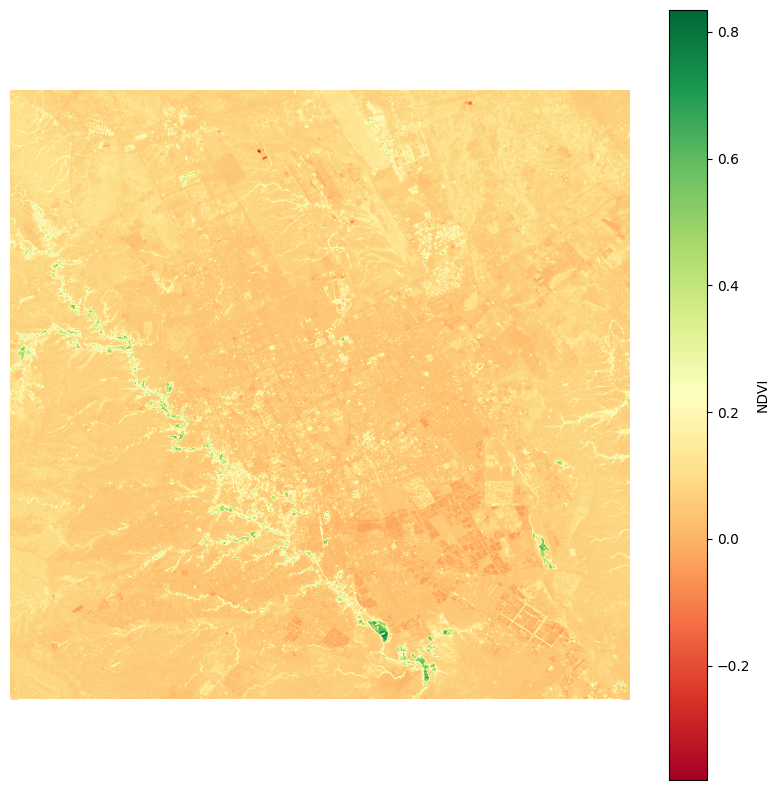

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

In [22]:


# Function to read image and convert to array
def read_image(image_path):
    ds = gdal.Open(image_path)
    band_data = []
    for b in range(1, ds.RasterCount + 1):
        band = ds.GetRasterBand(b)
        band_data.append(band.ReadAsArray())
    img_array = np.dstack(band_data)
    return img_array

# Function to preprocess the image data
def preprocess_data(img_array):
    img_array = img_array.reshape(-1, img_array.shape[2])
    for i in range(img_array.shape[1]):
        channel = img_array[:, i]
        channel_mean = np.nanmean(channel)
        channel[np.isnan(channel)] = channel_mean
    return img_array

# Function to determine the optimal number of clusters using the Elbow Method
def find_optimal_k(img_array):
    k_values = range(1, 11)
    sse = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(img_array)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse, '-o')
    plt.title('Elbow Method to Determine Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Function to apply k-means clustering with the optimal k
def cluster_image(img_array, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(img_array)
    clustered_img = kmeans.labels_.reshape(shape[0], shape[1])
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {optimal_k} colors')
    plt.show()




c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

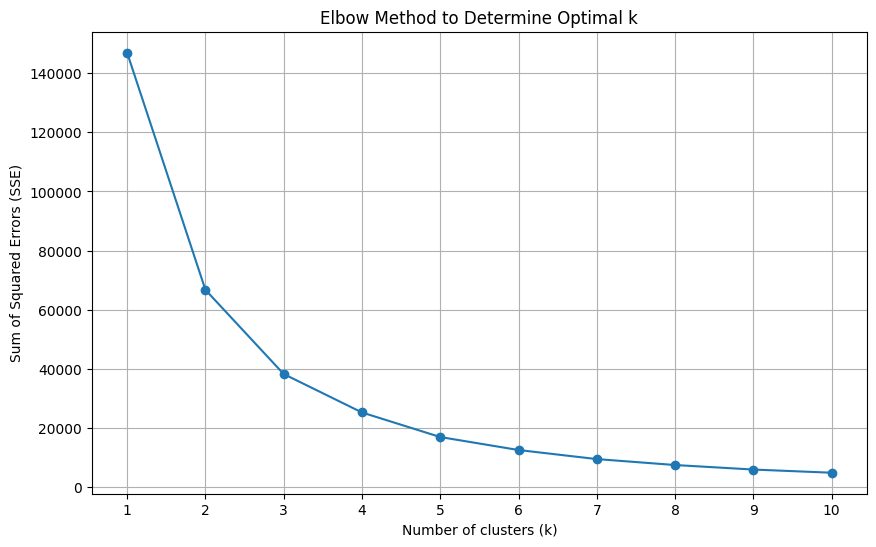

In [23]:
# Main workflow
image_path = "G:\\My Drive\\Riyadh-Data-set\\NDVI-Data\\NDVI-data\\NDVI_RUH-B4-B8_2018-12-15.tif"  # Replace with your image path
original_img_array = read_image(image_path)
img_array = preprocess_data(original_img_array)

# Find the optimal number of clusters
find_optimal_k(img_array)

# After visually determining the optimal k from the Elbow plot,
# replace 'optimal_k' with that value and uncomment the next line
# cluster_image(img_array, optimal_k=YOUR_OPTIMAL_K_VALUE_HERE)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


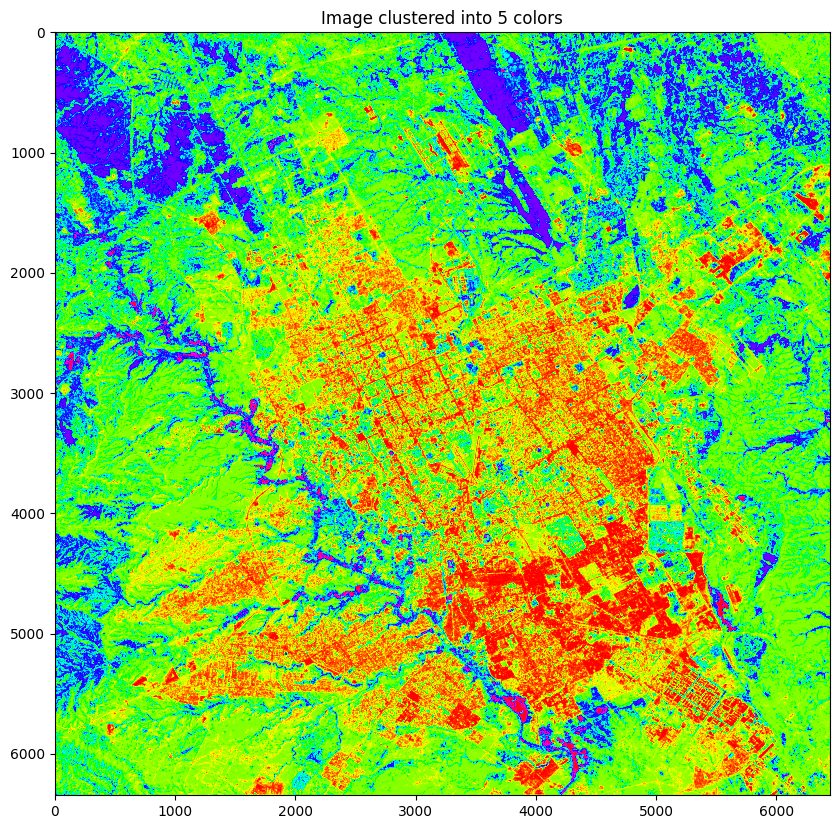

In [24]:
# After visually determining the optimal k from the Elbow plot,
# replace 'optimal_k' with that value and uncomment the next line
cluster_image(img_array, optimal_k=5)